In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import sys
sys.path.append('/content/drive/MyDrive/Session10')

In [ ]:
!pip install torch_lr_finder
!pip install torchsummary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 123.9/124.2 MB 126.2 MB/s eta 0:00:01

In [5]:
from model import Net_10
from utils import (
   test,
   train,
   load_data,
   visualise_input
)

from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch_lr_finder import LRFinder
# import albumentations as A
# from albumentations.pytorch import ToTensorV2

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torchvision import datasets, transforms
# import os
# import numpy as np
# import torchvision
# import numpy as np
# import matplotlib.pyplot as plt
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
# # from albumentations.pytorch import ToTensorV2
# from torchvision import datasets, transforms, utils

In [6]:
SEED = 1
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
# For reproducibility
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)


CUDA Available? True


In [7]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torchvision import datasets, transforms

# dropout_value = 0.2


# class Net_new(nn.Module):
#     def __init__(self):
#       super(Net_new, self).__init__()


#        # Prep Layer
#       self.convblock1 = nn.Sequential( nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
#                                        nn.BatchNorm2d(64),
#                                        nn.ReLU()
#                                        )

#       # CONVOLUTION BLOCK 1
#       self.convblock2 = nn.Sequential( nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
#                                       nn.MaxPool2d(kernel_size=2, stride=2),
#                                       nn.BatchNorm2d(128),
#                                       nn.ReLU()
#         )

#       self.R1 = nn.Sequential(nn.Conv2d (in_channels=128, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
#                               nn.BatchNorm2d(128),
#                               nn.ReLU(),
#                               nn.Conv2d(in_channels=128,  out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
#                               nn.BatchNorm2d(128),
#                               nn.ReLU())



#       # CONVOLUTION BLOCK 2
#       self.convblock3 = nn.Sequential(nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), padding=1, bias=False),
#                                       nn.MaxPool2d(kernel_size=2, stride=2),
#                                       nn.BatchNorm2d(256),
#                                       nn.ReLU()
#                                       )

#       # CONVOLUTION BLOCK 3
#       self.convblock4 = nn.Sequential(nn.Conv2d(256, 512, 3,padding=1, bias=False),
#                                       nn.MaxPool2d(kernel_size=2, stride=2),
#                                       nn.BatchNorm2d(512),
#                                       nn.ReLU()
#             )

#       self.R2  = nn.Sequential(nn.Conv2d (in_channels=512, out_channels=512, kernel_size=(3, 3), padding=1, bias=False),
#                                nn.BatchNorm2d(512),
#                                nn.ReLU(),
#                                nn.Conv2d (in_channels=512, out_channels=512, kernel_size=(3, 3), padding=1, bias=False),
#                                nn.BatchNorm2d(512),
#                                nn.ReLU()
#             )

#       self.maxpool = nn.MaxPool2d(kernel_size=4)

#       self.global_pool = nn.AdaptiveAvgPool2d((1, 1))
#       self.fc = nn.Linear(512, 10)



#     def forward(self, x):
#         x = self.convblock1(x)
#         x = self.convblock2(x)
#         x= self.R1(x) + x
#         x = self.convblock3(x)
#         x = self.convblock4(x)
#         x= self.R2(x) + x
#         x = self.maxpool(x)
#         x = self.global_pool(x)
#         # print(x.shape)
#         x = x.view(x.size(0), -1)

#         x = self.fc(x)
#         return F.log_softmax(x, dim=-1)



In [8]:

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
_model = Net_10().to(device)
summary(_model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

In [9]:
train_loader, test_loader = load_data()

100%|██████████| 170498071/170498071 [00:12<00:00, 13165115.76it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [ ]:
# pip install torch-lr-finder

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.63E-02


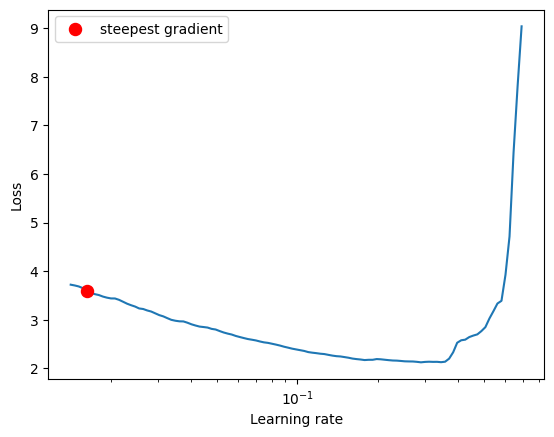

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(_model.parameters(), lr=0.01, weight_decay=1e-4)
lr_finder = LRFinder(_model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200,step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [11]:
EPOCHS = 24
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,  max_lr= 1.63E-02,
                                          pct_start = 5/EPOCHS,                       div_factor = 100,
                                          epochs=24,
                                          steps_per_epoch=len(train_loader),
                                          three_phase=False,
                                          verbose = True)


for epoch in range(EPOCHS):
    print("EPOCH:", epoch)

    train(_model, device, train_loader, optimizer, epoch, criterion, scheduler)
    test(_model, device, test_loader,criterion)


EPOCH: 0


Train: Loss=1.2480897903442383 Batch_id=97 Accuracy=42.18: 100%|██████████| 98/98 [00:18<00:00,  5.25it/s]



Test set: Average loss: 0.0027, Accuracy: 5620/10000 (56.20%)

EPOCH: 1


Train: Loss=0.9302636981010437 Batch_id=97 Accuracy=62.58: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]



Test set: Average loss: 0.0019, Accuracy: 6874/10000 (68.74%)

EPOCH: 2


Train: Loss=1.0453485250473022 Batch_id=97 Accuracy=67.48: 100%|██████████| 98/98 [00:19<00:00,  5.07it/s]



Test set: Average loss: 0.0021, Accuracy: 6744/10000 (67.44%)

EPOCH: 3


Train: Loss=0.7670405507087708 Batch_id=97 Accuracy=69.44: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]



Test set: Average loss: 0.0016, Accuracy: 7376/10000 (73.76%)

EPOCH: 4


Train: Loss=0.6318268775939941 Batch_id=97 Accuracy=74.51: 100%|██████████| 98/98 [00:19<00:00,  5.04it/s]



Test set: Average loss: 0.0012, Accuracy: 8047/10000 (80.47%)

EPOCH: 5


Train: Loss=0.6585720777511597 Batch_id=97 Accuracy=76.81: 100%|██████████| 98/98 [00:18<00:00,  5.19it/s]



Test set: Average loss: 0.0014, Accuracy: 7683/10000 (76.83%)

EPOCH: 6


Train: Loss=0.6304011940956116 Batch_id=97 Accuracy=78.97: 100%|██████████| 98/98 [00:20<00:00,  4.90it/s]



Test set: Average loss: 0.0011, Accuracy: 8057/10000 (80.57%)

EPOCH: 7


Train: Loss=0.6291211247444153 Batch_id=97 Accuracy=79.20: 100%|██████████| 98/98 [00:21<00:00,  4.67it/s]



Test set: Average loss: 0.0014, Accuracy: 7698/10000 (76.98%)

EPOCH: 8


Train: Loss=0.5377020835876465 Batch_id=97 Accuracy=80.28: 100%|██████████| 98/98 [00:22<00:00,  4.39it/s]



Test set: Average loss: 0.0011, Accuracy: 8205/10000 (82.05%)

EPOCH: 9


Train: Loss=0.5431684255599976 Batch_id=97 Accuracy=81.14: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]



Test set: Average loss: 0.0011, Accuracy: 8229/10000 (82.29%)

EPOCH: 10


Train: Loss=0.5661425590515137 Batch_id=97 Accuracy=81.60: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]



Test set: Average loss: 0.0010, Accuracy: 8312/10000 (83.12%)

EPOCH: 11


Train: Loss=0.4696706533432007 Batch_id=97 Accuracy=82.54: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]



Test set: Average loss: 0.0009, Accuracy: 8523/10000 (85.23%)

EPOCH: 12


Train: Loss=0.5077657103538513 Batch_id=97 Accuracy=82.71: 100%|██████████| 98/98 [00:18<00:00,  5.17it/s]



Test set: Average loss: 0.0010, Accuracy: 8319/10000 (83.19%)

EPOCH: 13


Train: Loss=0.43404170870780945 Batch_id=97 Accuracy=83.61: 100%|██████████| 98/98 [00:19<00:00,  5.13it/s]



Test set: Average loss: 0.0009, Accuracy: 8563/10000 (85.63%)

EPOCH: 14


Train: Loss=0.3886740505695343 Batch_id=97 Accuracy=84.51: 100%|██████████| 98/98 [00:18<00:00,  5.17it/s]



Test set: Average loss: 0.0009, Accuracy: 8575/10000 (85.75%)

EPOCH: 15


Train: Loss=0.4451799988746643 Batch_id=97 Accuracy=85.54: 100%|██████████| 98/98 [00:19<00:00,  5.06it/s]



Test set: Average loss: 0.0007, Accuracy: 8781/10000 (87.81%)

EPOCH: 16


Train: Loss=0.3785986006259918 Batch_id=8 Accuracy=86.50:   9%|▉         | 9/98 [00:02<00:22,  4.04it/s]


KeyboardInterrupt: 